In [ ]:
! pip install tomotopy
! pip install pyldavis
! pip install numpy

### 도서-키워드

In [70]:
import tomotopy as tp   # 토픽모델링 패키지
import pyLDAvis       # 시각화 패키지
import numpy as np    # 파이썬 계산기
import pandas as pd   # 파이썬 엑셀
from tqdm import tqdm

In [161]:
import pandas as pd

# 파일을 읽어옵니다
file_path = "C:/Users/user/Desktop/도서관_공모전/book_analysis_final.xlsx"
df = pd.read_excel(file_path, index_col=0, sheet_name=3)


# '도서명'을 기준으로 '키워드'를 연결하여 새로운 DataFrame 생성
df_grouped = df.groupby('도서명')['키워드'].apply(lambda x: ', '.join(x)).reset_index()


# 결과를 출력합니다
print(df_grouped)

df1 = pd.DataFrame(df_grouped)
with pd.ExcelWriter('example_analysis_final.xlsx') as writer:
    df1.to_excel(writer)
    

                                            도서명  \
0     (10대를 위한) 정의란 무엇인가 :하버드대 마이클 샌델 교수의 정의 수업   
1                              (10원으로 배우는)경제이야기   
2                               (21세기) 먼나라 이웃나라   
3                                (21세기)먼나라 이웃나라   
4                   (2~11세) 아이가 있는 집에 딱 좋은 가족밥상   
...                                         ...   
3145               흔한남매의 흔한 호기심 :일상에서 만나는 과학 상식   
3146                            희랍어 시간 :한강 장편소설   
3147                                   흰 :한강 소설   
3148                                히말라야에서 살아남기   
3149                                     히틀러의 딸   

                                                    키워드  
0     정의, 상황, 고민, 사람, 생각, 문제, 샌델, 판단, 딜레마, 이해, 이미지, ...  
1     경제, 은행, 가격, 가지, 물건, 화폐, 어린이, 역할, 소비중심적인, 파악, 필...  
2     중국, 일본, 만화, 세계, 전쟁, 먼나라 이웃나라, 유럽, 정부, 청나라, 나라,...  
3     미국, 세계, 만화, 나라, 독일, 제임스, 문화, 역사, 미국인, 대통령, 윌리엄...  
4     아이, 이유식, 엄마, 레시피, 양념, 음식, 식습관, 어른, 가족, 동시, 완성,...  
...                                    

### 토픽 개수 정하기

 perplexity 낮고 cohrence 높은 지점



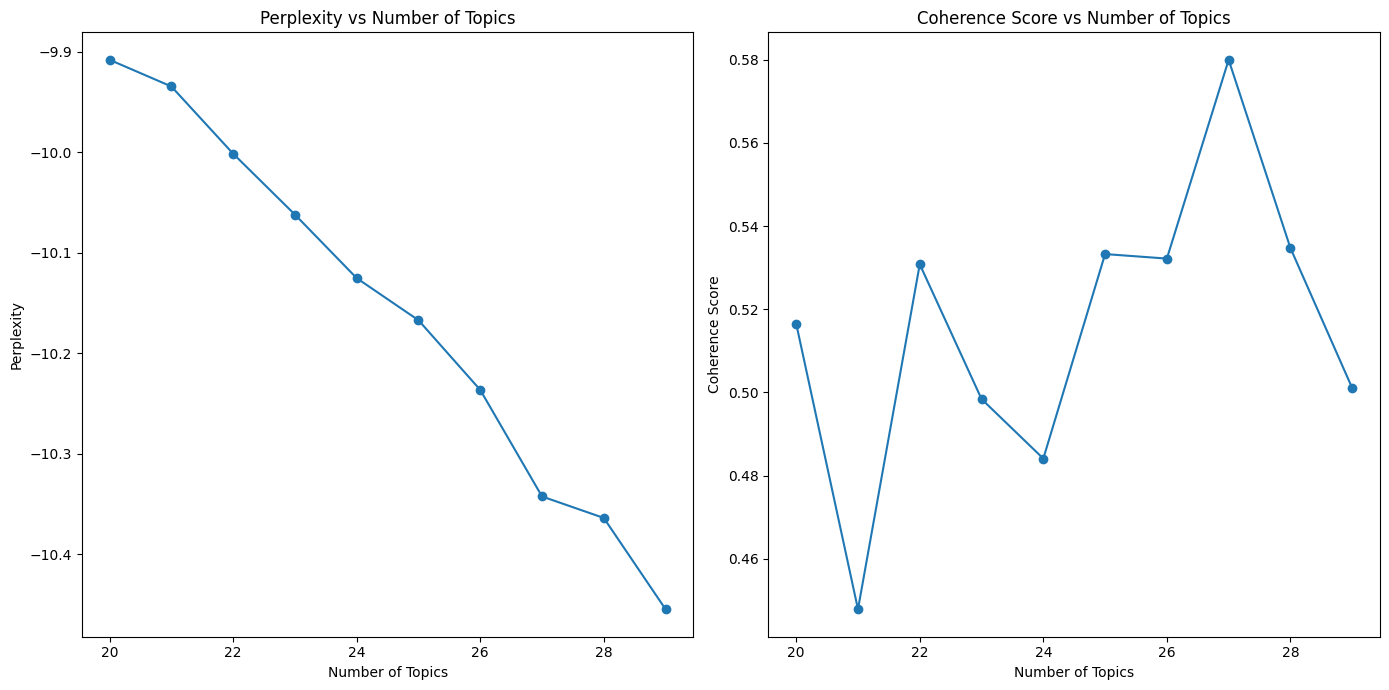

Optimal number of topics based on Perplexity: 29
Optimal number of topics based on Coherence Score: 27


In [1]:
import pandas as pd
from gensim import corpora, models
import matplotlib.pyplot as plt

df1 = pd.read_excel("C:/Users/user/Desktop/도서관_공모전/최종/example_analysis_final.xlsx")

# '키워드' 열에서 문자열을 단어 리스트로 변환
texts = [keywords.split(', ') for keywords in df1['키워드']]

# 사전 및 코퍼스 생성
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

def calculate_coherence(model, texts, dictionary):
    coherence_model = models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

def evaluate_topics(num_topics_range, corpus, dictionary):
    perplexities = []
    coherence_scores = []
    
    for num_topics in num_topics_range:
        lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        perplexities.append(lda_model.log_perplexity(corpus))
        coherence_scores.append(calculate_coherence(lda_model, texts, dictionary))
    
    return perplexities, coherence_scores

# 다양한 토픽 개수 설정
num_topics_range = range(20, 30)

# Perplexity와 Coherence Score 계산
perplexities, coherence_scores = evaluate_topics(num_topics_range, corpus, dictionary)

# Perplexity 그래프
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(num_topics_range, perplexities, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity')
plt.title('Perplexity vs Number of Topics')

# Coherence Score 그래프
plt.subplot(1, 2, 2)
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')

plt.tight_layout()
plt.show()

# Perplexity: Perplexity 값이 급격히 낮아지는 지점을 찾습니다. 일반적으로 perplexity가 최저점에 가까운 지점을 고려할 수 있습니다.
# Coherence Score: Coherence score가 가장 높은 지점을 찾습니다.

# 최적의 토픽 개수 찾기
optimal_topic_perplexity = num_topics_range[perplexities.index(min(perplexities))]
optimal_topic_coherence = num_topics_range[coherence_scores.index(max(coherence_scores))]

print(f"Optimal number of topics based on Perplexity: {optimal_topic_perplexity}")
print(f"Optimal number of topics based on Coherence Score: {optimal_topic_coherence}")


### 토픽모델링 실시

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# 1. 데이터 로드
file_path = "C:/Users/user/Desktop/도서관_공모전/example_analysis.xlsx"
df1 = pd.read_excel(file_path)

# 2. '키워드' 열을 사용하여 문서 목록 생성
documents = df1['키워드'].astype(str).tolist()

# 3. 벡터화: 명사만 나열된 키워드를 벡터화
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# 4. LDA 모델 학습
n_topics = 27
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# 5. 모든 단어를 사용하여 각 토픽의 대표 단어 추출
def get_topic_representative_words(lda_model, vectorizer):
    words = vectorizer.get_feature_names_out()
    topic_representative_words = []
    
    for topic_idx, topic in enumerate(lda_model.components_):
        # 모든 단어의 중요도
        topic_words = [words[i] for i in np.argsort(topic)[::-1]]
        topic_importance = [topic[i] for i in np.argsort(topic)[::-1]]
        
        # 가장 중요한 단어 선택 (가장 높은 중요도)
        most_important_word = topic_words[np.argmax(topic_importance)]
        topic_representative_words.append(most_important_word)
    
    return topic_representative_words

# 대표 단어 생성
topic_representative_words = get_topic_representative_words(lda, vectorizer)

# 6. 각 도서에 대한 토픽 비율 계산
topic_probabilities = lda.transform(X)

# 각 도서에 대해 가장 비율이 높은 토픽을 찾기
df1_topic_probabilities = pd.DataFrame(topic_probabilities, columns=[f'Topic {i}' for i in range(n_topics)])
df1 = pd.concat([df1, df1_topic_probabilities], axis=1)

# 7. 각 토픽의 키워드 추출
def get_topic_keywords(lda_model, vectorizer):
    topic_keywords = []
    words = vectorizer.get_feature_names_out()
    
    for topic_idx, topic in enumerate(lda_model.components_):
        # 모든 단어와 중요도
        top_keywords = [words[i] for i in np.argsort(topic)[::-1]]
        topic_keywords.append(top_keywords)
    
    return topic_keywords

# 각 토픽의 키워드 생성
topic_keywords = get_topic_keywords(lda, vectorizer)

# 8. 각 토픽의 키워드를 데이터프레임으로 변환 (각 키워드를 열로 나누기)
topic_keywords_df = pd.DataFrame(
    {f'Topic {i} Keywords': pd.Series(topic_keywords[i]) for i in range(n_topics)}
)

# 9. 가장 높은 비율을 가진 토픽을 찾기
df1['Highest_Topic'] = df1_topic_probabilities.idxmax(axis=1)
df1['Highest_Topic_Index'] = df1['Highest_Topic'].apply(lambda x: int(x.replace('Topic ', '')))
df1['Highest_Topic_Name'] = df1['Highest_Topic_Index'].map(lambda x: topic_representative_words[x])

# 10. 결과 저장
# 10.1 각 도서의 토픽 비율이 포함된 엑셀 파일
output_file_path_1 = "C:/Users/user/example_analysis_with_topic_probabilities.xlsx"
df1.to_excel(output_file_path_1, index=False)

# 10.2 각 토픽의 키워드를 포함한 엑셀 파일 (각 키워드를 열로 나누기)
output_file_path_2 = "C:/Users/user/topic_keywords.xlsx"
topic_keywords_df.to_excel(output_file_path_2, index=False)

print("엑셀 파일이 성공적으로 저장되었습니다.")


엑셀 파일이 성공적으로 저장되었습니다.
